# Aula 18

# NumPy, Pandas e Matplotlib

* https://numpy.org/devdocs/user/quickstart.html

* https://pandas.pydata.org

* https://matplotlib.org/index.html

## 1. NumPy (continuação)

### Tipo Array *versus* Tipo Matriz

Na aula passada, definimos matrizes como um array (**ndarray**) de duas dimensões. Mas existe no NumPy, um tipo **matrix** para trabalharmos diretamente com matrizes. Apesar de representarem a mesma coisa, são de tipos diferentes e portanto, algumas operações aplicadas sobre elas apresentam resultados diferentes. 

In [1]:
import numpy as np # para instalar no próprio notebook -> !pip install numpy 

In [2]:
a = np.array([[1,2],[3,4]])
b = np.array([[1,9],[7,5]])

In [3]:
a

array([[1, 2],
       [3, 4]])

In [4]:
b

array([[1, 9],
       [7, 5]])

In [5]:
a*b

array([[ 1, 18],
       [21, 20]])

In [6]:
# a.dot(b) ou np.dot(a,b): calcula a multiplicação entre as matrizes a e b
np.dot(a,b)

array([[15, 19],
       [31, 47]])

In [7]:
a.dot(b)

array([[15, 19],
       [31, 47]])

In [8]:
A = np.matrix(a)
B = np.matrix(b)

In [9]:
A

matrix([[1, 2],
        [3, 4]])

In [10]:
B

matrix([[1, 9],
        [7, 5]])

* Como são do tipo **matrix**, a multiplicação comum (usando o asterisco) realiza a multiplicação entre as matrizes. Ou seja, resulta no mesmo valor que `np.dot(A,B)`.

In [11]:
A*B 

matrix([[15, 19],
        [31, 47]])

In [12]:
np.dot(A,B)

matrix([[15, 19],
        [31, 47]])

In [13]:
print(type(a))
print(type(A))
print(type(a*b))
print(type(A*B))
print(type(a*B)) # prevalece o tipo matrix 

<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>
<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>
<class 'numpy.matrixlib.defmatrix.matrix'>


* A Transposição de vetores do tipo **array** (unidimensionais) deve ser feita usando `.reshape()`. Matrizes do tipo array realizam a transpoição usando o método `.T`. Para o tipo **matrix**, o método `.T` realiza ambas transposições.

In [14]:
c = np.ones(4)
print(c)
print(c.shape,'\n')
print(c.T)
print(c.T.shape,'\n')

[1. 1. 1. 1.]
(4,) 

[1. 1. 1. 1.]
(4,) 



In [15]:
print(c.reshape(len(c),1))
c.reshape(len(c),1).shape

[[1.]
 [1.]
 [1.]
 [1.]]


(4, 1)

In [16]:
C = np.matrix(np.ones(4))
print(C)
print(C.shape,'\n')
print(C.T)
print(C.T.shape,'\n')

[[1. 1. 1. 1.]]
(1, 4) 

[[1.]
 [1.]
 [1.]
 [1.]]
(4, 1) 



In [17]:
print(np.array([np.ones(4)]).T)
np.array([np.ones(4)]).T.shape

[[1.]
 [1.]
 [1.]
 [1.]]


(4, 1)

In [18]:
a.T

array([[1, 3],
       [2, 4]])

In [19]:
A.T

matrix([[1, 3],
        [2, 4]])

### Criando Matrizes

Podemos criar uma matriz a partir de todas as técnicas apresentadas na aula anterior para matriz do tipo array de 2 dimensões. 

Os vetores criados a partir do tipo **ndarray** são unidimensionais. No entanto, os vetores criados a partir da função `np.matrix()` gera um tipo **matrix** bidimensional.  Vamos ver isso?

In [20]:
M = np.matrix(np.zeros((3,3)))
M

matrix([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [21]:
L = np.matrix(np.ones(3)*10) # automaticamente transforma em um vetor linha
L

matrix([[10., 10., 10.]])

In [22]:
C = np.matrix(np.arange(1,4)) 
C = C.T# vetor coluna
C

matrix([[1],
        [2],
        [3]])

In [23]:
print('Dimensão da matriz M:', M.ndim)
print('Shape da matriz M:', M.shape)
print()
print('Dimensão do vetor linha:', L.ndim)
print('Shape do vetor linha:', L.shape)
print()
print('Dimensão do vetor coluna:', C.ndim)
print('Shape do vetor coluna:', C.shape)

Dimensão da matriz M: 2
Shape da matriz M: (3, 3)

Dimensão do vetor linha: 2
Shape do vetor linha: (1, 3)

Dimensão do vetor coluna: 2
Shape do vetor coluna: (3, 1)


Comparando um "vetor" gerado a partir do tipo *array* com outro gerado a partir do tipo *matrix*. 

In [24]:
l = np.ones(3)*10
l

array([10., 10., 10.])

In [25]:
L = np.matrix(L)
L

matrix([[10., 10., 10.]])

In [26]:
print(l.ndim) # unidimensional
print(L.ndim) # bidimensional
print(l.shape) # vetor com uma linha formado por 3 elementos
print(L.shape) # vetor linha (1 linha, 3 colunas)

1
2
(3,)
(1, 3)


In [27]:
L.shape[0]

1

### Indexação Booleana

In [28]:
nomes = np.array(['Ana', 'Carol', 'Walter', 'Carol', 'Ana', 'Hugo', 'Hugo'])
nomes

array(['Ana', 'Carol', 'Walter', 'Carol', 'Ana', 'Hugo', 'Hugo'],
      dtype='<U6')

In [29]:
nomes == 'Carol'

array([False,  True, False,  True, False, False, False])

In [30]:
dados = np.array(np.random.random((7, 4)))
dados

array([[0.04673793, 0.29143681, 0.31646316, 0.49312625],
       [0.84156857, 0.05460488, 0.55404209, 0.58708481],
       [0.36799623, 0.27975596, 0.98428662, 0.70585025],
       [0.37128574, 0.18483485, 0.96804738, 0.01189229],
       [0.65278412, 0.5364285 , 0.17015946, 0.68742526],
       [0.27303587, 0.33802032, 0.60833302, 0.5536136 ],
       [0.44292037, 0.11575848, 0.51369339, 0.52072292]])

**Obs.:** O array booleano deve ter o mesmo comprimento que o eixo do array que está indexando!

In [31]:
dados[nomes == 'Carol',:]

array([[0.84156857, 0.05460488, 0.55404209, 0.58708481],
       [0.37128574, 0.18483485, 0.96804738, 0.01189229]])

In [32]:
dados[nomes == 'Carol',1]

array([0.05460488, 0.18483485])

In [33]:
dados[nomes != 'Carol',:] # dados[~(nomes == 'Carol'),:]

array([[0.04673793, 0.29143681, 0.31646316, 0.49312625],
       [0.36799623, 0.27975596, 0.98428662, 0.70585025],
       [0.65278412, 0.5364285 , 0.17015946, 0.68742526],
       [0.27303587, 0.33802032, 0.60833302, 0.5536136 ],
       [0.44292037, 0.11575848, 0.51369339, 0.52072292]])

In [34]:
dados[~(nomes == 'Carol'),:]

array([[0.04673793, 0.29143681, 0.31646316, 0.49312625],
       [0.36799623, 0.27975596, 0.98428662, 0.70585025],
       [0.65278412, 0.5364285 , 0.17015946, 0.68742526],
       [0.27303587, 0.33802032, 0.60833302, 0.5536136 ],
       [0.44292037, 0.11575848, 0.51369339, 0.52072292]])

In [35]:
dados[(nomes == 'Carol') | (nomes == 'Walter'),:] # & (and),  | (or)

array([[0.84156857, 0.05460488, 0.55404209, 0.58708481],
       [0.36799623, 0.27975596, 0.98428662, 0.70585025],
       [0.37128574, 0.18483485, 0.96804738, 0.01189229]])

In [36]:
dados

array([[0.04673793, 0.29143681, 0.31646316, 0.49312625],
       [0.84156857, 0.05460488, 0.55404209, 0.58708481],
       [0.36799623, 0.27975596, 0.98428662, 0.70585025],
       [0.37128574, 0.18483485, 0.96804738, 0.01189229],
       [0.65278412, 0.5364285 , 0.17015946, 0.68742526],
       [0.27303587, 0.33802032, 0.60833302, 0.5536136 ],
       [0.44292037, 0.11575848, 0.51369339, 0.52072292]])

In [37]:
dados[dados<0.5]

array([0.04673793, 0.29143681, 0.31646316, 0.49312625, 0.05460488,
       0.36799623, 0.27975596, 0.37128574, 0.18483485, 0.01189229,
       0.17015946, 0.27303587, 0.33802032, 0.44292037, 0.11575848])

In [38]:
dados[dados[:,1]<0.5]

array([[0.04673793, 0.29143681, 0.31646316, 0.49312625],
       [0.84156857, 0.05460488, 0.55404209, 0.58708481],
       [0.36799623, 0.27975596, 0.98428662, 0.70585025],
       [0.37128574, 0.18483485, 0.96804738, 0.01189229],
       [0.27303587, 0.33802032, 0.60833302, 0.5536136 ],
       [0.44292037, 0.11575848, 0.51369339, 0.52072292]])

In [39]:
dados[dados[:,1]<0.5].shape

(6, 4)

In [40]:
arr = np.array([1, 2, 3, np.nan, np.nan, 4])
arr

array([ 1.,  2.,  3., nan, nan,  4.])

In [41]:
arr.sum()

nan

In [42]:
np.isnan(arr)

array([False, False, False,  True,  True, False])

In [43]:
arr[~np.isnan(arr)].max()

4.0

In [44]:
arr

array([ 1.,  2.,  3., nan, nan,  4.])

### Removendo Duplicatas

In [45]:
nomes

array(['Ana', 'Carol', 'Walter', 'Carol', 'Ana', 'Hugo', 'Hugo'],
      dtype='<U6')

In [46]:
sorted(set(nomes))

['Ana', 'Carol', 'Hugo', 'Walter']

In [47]:
np.unique(nomes) # é o mesmo que fazer sorted(set(nomes))

array(['Ana', 'Carol', 'Hugo', 'Walter'], dtype='<U6')

In [48]:
nomes

array(['Ana', 'Carol', 'Walter', 'Carol', 'Ana', 'Hugo', 'Hugo'],
      dtype='<U6')

In [49]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

### Estatísticas

<img src="../Figuras/eixos.jpg" alt="drawing" width="500"/>

In [50]:
#arr = np.random.randint(1, 11, (2,3))
m = np.matrix(np.random.randint(1, 11, (4,4)))
m

matrix([[ 8,  1,  7, 10],
        [ 6, 10,  1,  6],
        [ 1,  2,  5,  3],
        [ 7,  2,  9,  7]])

In [51]:
print(m.mean(),'\n')
print(m.mean(axis=0),'\n') # eixo 0: média das linhas de cada coluna
print(m.mean(axis=1),'\n') # eixo 1: média das colunas de cada linha

5.3125 

[[5.5  3.75 5.5  6.5 ]] 

[[6.5 ]
 [5.75]
 [2.75]
 [6.25]] 



In [52]:
print(m.sum(),'\n')
print(m.sum(axis=0),'\n') # eixo 0: soma das linhas de cada coluna
print(m.sum(axis=1),'\n') # eixo 1: soma das colunas de cada linha

85 

[[22 15 22 26]] 

[[26]
 [23]
 [11]
 [25]] 



In [53]:
print(m.cumsum(),'\n')
print(m.cumsum(axis=0),'\n') # eixo 0: soma acumulada das linhas de cada coluna
print(m.cumsum(axis=1),'\n') # eixo 1: soma acumulada das colunas de cada linha

[[ 8  9 16 26 32 42 43 49 50 52 57 60 67 69 78 85]] 

[[ 8  1  7 10]
 [14 11  8 16]
 [15 13 13 19]
 [22 15 22 26]] 

[[ 8  9 16 26]
 [ 6 16 17 23]
 [ 1  3  8 11]
 [ 7  9 18 25]] 



### Ordenamento

In [54]:
m = np.matrix(np.random.randint(1, 11, (4,4)))
m

matrix([[ 6,  9,  8,  2],
        [ 2,  9,  9, 10],
        [ 5,  1,  7,  9],
        [ 7,  8, 10,  7]])

In [55]:
print(m,'\n')
m.sort(0) # ordenamento dos elementos das linhas de cada coluna
print(m,'\n')
m.sort(1) # ordenamento dos elementos das colunas de cada linha
print(m,'\n')

[[ 6  9  8  2]
 [ 2  9  9 10]
 [ 5  1  7  9]
 [ 7  8 10  7]] 

[[ 2  1  7  2]
 [ 5  8  8  7]
 [ 6  9  9  9]
 [ 7  9 10 10]] 

[[ 1  2  2  7]
 [ 5  7  8  8]
 [ 6  9  9  9]
 [ 7  9 10 10]] 



### Concatenação

In [56]:
l = np.matrix(np.ones(3))
c = np.matrix(np.ones(3)).T
m = np.matrix([[1, 2, 3], [4, 5, 6], [7,8,9]])

In [57]:
np.vstack((m,l))

matrix([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.],
        [1., 1., 1.]])

In [58]:
np.hstack((m,c))

matrix([[1., 2., 3., 1.],
        [4., 5., 6., 1.],
        [7., 8., 9., 1.]])

In [59]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

In [60]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [61]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [62]:
np.concatenate((a, b), axis=None)

array([1, 2, 3, 4, 5, 6])

## 2. Pandas

Apesar do **Pandas** adota muitas codificações do **NumPy**, a maior diferença é que o **Pandas** foi projetado para trabalhar com dados tabulares ou heterogêneos. Por outro lado, o **NumPy** é mais adequado para trabalhar com dados de matriz numérica homogêneos.

In [63]:
import pandas as pd # para instalar no próprio notebook -> !pip install pandas 

### Estrutura de Dados: Séries

Uma série é um objeto unidimensional do tipo array que contém uma **sequência de valores** (de tipos semelhantes aos tipos NumPy) e um array associado formado pelos rótulos de dados, denominado **índice**. A série mais simples é formada a partir de apenas uma array de dados.

A representação em cadeia de uma série exibida interativamente mostra o índice à esquerda e os valores à direita. 

In [64]:
series = pd.Series([4, 7, 5, 3])
series

0    4
1    7
2    5
3    3
dtype: int64

In [65]:
series.values # acessando os dados da série

array([4, 7, 5, 3], dtype=int64)

In [66]:
series.index

RangeIndex(start=0, stop=4, step=1)

In [67]:
series.shape # series.size ou len(series)

(4,)

Como não especificamos um índice para os dados, por padrão é criado uma sequência de números inteiros de $0$ a $N-1$, onde $N$ é a quantidade de dados.

In [68]:
#series = pd.Series([4, 7, 5, 3], index=["Carol", "Walter", "Moacyr", "Branco"])
series.index = ["Carol", "Walter", "Moacyr", "Branco"]
series

Carol     4
Walter    7
Moacyr    5
Branco    3
dtype: int64

In [69]:
print(series['Carol'])
print(series.Walter)
series.Walter = 6

4
7


In [70]:
series

Carol     4
Walter    6
Moacyr    5
Branco    3
dtype: int64

In [71]:
series[['Branco', 'Carol', 'Walter']] # lista de índices, mesmo que sejam strings e não números inteiros

Branco    3
Carol     4
Walter    6
dtype: int64

In [72]:
series[series < 5]

Carol     4
Branco    3
dtype: int64

In [73]:
series2 = series*2
series2

Carol      8
Walter    12
Moacyr    10
Branco     6
dtype: int64

### Estrutura de Dados: DataFrame

Por definição, **CSV** é um formato de arquivo que significa "comma-separated-values” (valores separados por vírgulas).


As bases utilizadas a seguir foram retiradas do meu repositório [**scopus-scraping**](https://github.com/anacwagner/scopus-scraping/tree/master/outputs/matlab). 

In [74]:
df1 = pd.read_csv('https://raw.githubusercontent.com/anacwagner/scopus-scraping/master/outputs/matlab/T_cit_acum.csv',
                sep=',',     # opcional; especificar como os dados estão separados
                header=None  # opcional; especificar se os dados possuem cabeçalhos
                 )

In [75]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1


In [76]:
df1.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
17380,18717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4
17381,18718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0


Mas o que significa cada coluna? Caso a base de dados não venha com um cabeçalho, podemos nomear as colunas de forma a facilitar a manipulação dos dados. 

In [77]:
nomes = ['id_a']
nomes = nomes + ['Ano '+str(i) for i in range(1970,2019)]

In [78]:
df1.columns=nomes
df1.head()

,id_a,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1


Assim como nas **Séries**, também podemos alterar a coluna índice. 

In [79]:
df1.index = df1['id_a'] # podemos alterar a coluna índice
df1.head(2)

,id_a,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
id_a,,,,,,,,,,,,,,,,,,,,,
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Neste caso, como substituímos a coluna índice pela coluna `id_a`, não tem necessidade de ter uma coluna repetida. Podemos deletar colunas e linhas de um dataframe usando o método `.drop` e indicando o eixo que estamos nos referindo. 

In [80]:
df1.drop(columns=['id_a'], axis=1).head(2) # a atributo .drop, exclui coluna(s) (axis=1) ou linha(s) (axis=0)

,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,Ano 1979,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
id_a,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [81]:
df1.drop([1,2,5],axis=0).head() # para atualizar, tem que armazenar o resultado em outra (ou na mesma) variável

,id_a,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
id_a,,,,,,,,,,,,,,,,,,,,,
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [82]:
df1.index = [i for i in range(1,len(df1)+1)]
df1.head()

,id_a,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1


Quando coletamos dados, alguns campos podem estar faltando. E dependendo do tipo de análise que desejamos fazer, vamos precisar de um tratamento diferenciado. 

Trata-se do processo de **limpeza e preparação dos dados**. 

In [83]:
df1_fillna = df1.fillna(0) # substitui todas as ocorrêcias de NaN's por zero
df1_fillna.head()

,id_a,Ano 1970,Ano 1971,Ano 1972,Ano 1973,Ano 1974,Ano 1975,Ano 1976,Ano 1977,Ano 1978,...,Ano 2009,Ano 2010,Ano 2011,Ano 2012,Ano 2013,Ano 2014,Ano 2015,Ano 2016,Ano 2017,Ano 2018
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [84]:
np.array(df1['Ano 2018']).sum()

30826

In [85]:
print(np.array(df1['Ano 2017']).sum())
print(np.array(df1_fillna['Ano 2017']).sum())

nan
29205.0


In [86]:
df_R2 = pd.read_csv('https://raw.githubusercontent.com/anacwagner/scopus-scraping/master/outputs/matlab/T_R2.csv',
                sep=',',     
                header=None,
                names=['id_a', 'n', 'var', 'fval', 'r2']
                 )

In [87]:
df_R2.head()

,id_a,n,var,fval,r2
0,1,11.0,0.00000,7.308100e-11,NaN
1,2,42.0,0.00000,1.819300e-27,NaN
2,3,11.0,0.00000,7.308100e-11,NaN
3,4,39.0,0.58704,2.223400e+00,0.99986
4,5,7.0,0.28571,3.725300e-02,0.99999


In [88]:
df_R2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17382 entries, 0 to 17381
Data columns (total 5 columns):
id_a    17382 non-null int64
n       16358 non-null float64
var     16358 non-null float64
fval    16358 non-null float64
r2      8229 non-null float64
dtypes: float64(4), int64(1)
memory usage: 679.1 KB


In [89]:
df_R2_cleaned = df_R2.dropna() # remove todas as linhas que possuem NaN's
df_R2_cleaned.head()

,id_a,n,var,fval,r2
3,4,39.0,0.587040,2.223400e+00,0.99986
4,5,7.0,0.285710,3.725300e-02,0.99999
5,6,23.0,0.083004,2.236300e-07,1.00000
7,8,27.0,0.259260,1.104700e+00,0.99976
8,9,6.0,0.166670,1.389600e-03,1.00000


In [90]:
df_R2_cleaned.iloc[0] # acessa uma linha pelo sua posição, independente do índice

id_a     4.00000
n       39.00000
var      0.58704
fval     2.22340
r2       0.99986
Name: 3, dtype: float64

In [91]:
df_R2_cleaned.loc[3] # acessa uma linha pelo seu índice

id_a     4.00000
n       39.00000
var      0.58704
fval     2.22340
r2       0.99986
Name: 3, dtype: float64

In [92]:
df_R2_cleaned.loc[df_R2_cleaned.r2 > 0.98].head()

,id_a,n,var,fval,r2
3,4,39.0,0.587040,2.223400e+00,0.99986
4,5,7.0,0.285710,3.725300e-02,0.99999
5,6,23.0,0.083004,2.236300e-07,1.00000
7,8,27.0,0.259260,1.104700e+00,0.99976
8,9,6.0,0.166670,1.389600e-03,1.00000


In [93]:
np.array(df_R2_cleaned.loc[df_R2_cleaned.r2 > 0.98, 'id_a'])

array([    4,     5,     6, ..., 18713, 18715, 18717], dtype=int64)

In [94]:
df_cit = pd.read_csv('https://raw.githubusercontent.com/anacwagner/scopus-scraping/master/outputs/var_cit_LOGIC.csv',
                sep=','
                 )

In [95]:
df_cit.shape

(326864, 7)

In [96]:
df_cit.index+=1
df_cit.head()

,SOURCE_A_ID,SOURCE_A_YEAR,SOURCE_J_ID,TARGET_A_ID,TARGET_A_YEAR,TARGET_J_ID,EDITIONS
1,1,2008,1,1232,2003,1,12
2,1,2008,1,18720,2003,19,1
3,1,2008,1,18102,2005,1,9
4,1,2008,1,9849,1973,1,7
5,1,2008,1,18723,1993,20,1


In [97]:
pd.value_counts(df_cit.SOURCE_A_ID)

8133     1590
14901     560
9114      534
17057     468
17343     443
15058     433
3369      429
3914      415
7033      400
5602      373
18352     369
5804      356
15883     323
3218      321
4466      321
4212      321
9216      311
2780      301
16568     290
8539      289
300       279
17487     278
18490     267
14881     262
5964      255
13120     254
6161      236
16267     231
9934      227
8945      220
         ... 
15292       1
3431        1
18271       1
7525        1
17843       1
11950       1
5630        1
4485        1
9282        1
17431       1
4026        1
16049       1
10054       1
14148       1
327         1
2502        1
13667       1
6305        1
1105        1
4044        1
10446       1
15670       1
7638        1
14209       1
11176       1
941         1
248         1
3388        1
9093        1
17572       1
Name: SOURCE_A_ID, Length: 17382, dtype: int64

In [98]:
np.array(pd.value_counts(df_cit.SOURCE_A_ID))

array([1590,  560,  534, ...,    1,    1,    1], dtype=int64)

In [99]:
df_cit[df_cit.SOURCE_A_ID == 8133].head()

,SOURCE_A_ID,SOURCE_A_YEAR,SOURCE_J_ID,TARGET_A_ID,TARGET_A_YEAR,TARGET_J_ID,EDITIONS
141387,8133,2007,10,106457,2002,28573,5
141388,8133,2007,10,106458,1991,28574,5
141389,8133,2007,10,106459,1991,28575,5
141390,8133,2007,10,106460,1991,28575,5
141391,8133,2007,10,106461,0,24,9


In [100]:
df_cit[df_cit.SOURCE_A_ID == 8133].shape

(1590, 7)

* O método `.duplicated()` retorna uma série booleana indicando se cada linha é uma duplicata (foi observada em uma linha anterior) ou não. 


* De maneira semelhante, `.drop_duplicates()` retorna um DataFrame em que a matriz duplicada é False.

In [101]:
df_cit.SOURCE_A_ID.duplicated().head()
#df_cit[df_cit.SOURCE_A_ID.duplicated()]

1    False
2     True
3     True
4     True
5     True
Name: SOURCE_A_ID, dtype: bool

In [102]:
df_cit_drop = df_cit.drop_duplicates('SOURCE_A_ID' , keep='first')
df_cit_drop.head()

,SOURCE_A_ID,SOURCE_A_YEAR,SOURCE_J_ID,TARGET_A_ID,TARGET_A_YEAR,TARGET_J_ID,EDITIONS
1,1,2008,1,1232,2003,1,12
7,2,1977,2,18725,1969,22,12
15,3,2008,3,18732,2000,29,10
59,4,1980,1,18776,1955,64,12
79,5,2012,4,18796,1985,47,7


In [103]:
id_j = np.array(df_cit_drop.SOURCE_J_ID)
id_j

array([ 1,  2,  3, ..., 12, 13,  6], dtype=int64)

In [104]:
df_R2['id_j'] = id_j

In [105]:
df_R2.head()

,id_a,n,var,fval,r2,id_j
0,1,11.0,0.00000,7.308100e-11,NaN,1
1,2,42.0,0.00000,1.819300e-27,NaN,2
2,3,11.0,0.00000,7.308100e-11,NaN,3
3,4,39.0,0.58704,2.223400e+00,0.99986,1
4,5,7.0,0.28571,3.725300e-02,0.99999,4


In [106]:
df_R2.groupby('id_j').n.sum()

id_j
1     48846.0
2     51069.0
3      1671.0
4      3983.0
5     28702.0
6     23049.0
7     35747.0
8     37259.0
9      2984.0
10     6584.0
11      957.0
12    56540.0
13    16235.0
14    13262.0
15     3544.0
16     2469.0
17      618.0
18      201.0
Name: n, dtype: float64

In [107]:
df_param = pd.read_csv('https://raw.githubusercontent.com/anacwagner/scopus-scraping/master/outputs/matlab/T_param.csv',
                sep=',',
                header=None,
                names = ['id_a', 'fitness', 'immediacy', 'longevity', 'id_j']
                 )

In [108]:
df_param.head()

,id_a,fitness,immediacy,longevity,id_j
0,1,9.017600e-08,0.46073,0.22800,1
1,2,1.125000e-16,0.13028,0.05093,2
2,3,9.017600e-08,0.46073,0.22800,3
3,4,9.688700e-02,0.73605,0.84364,1
4,5,3.374000e-02,1.14490,0.32122,4


In [109]:
df_param2=df_param[~df_param.fitness.isna()]
df_param2.head()

,id_a,fitness,immediacy,longevity,id_j
0,1,9.017600e-08,0.46073,0.22800,1
1,2,1.125000e-16,0.13028,0.05093,2
2,3,9.017600e-08,0.46073,0.22800,3
3,4,9.688700e-02,0.73605,0.84364,1
4,5,3.374000e-02,1.14490,0.32122,4


## Matlplotlib

Exemplo de visualizações envolvendo outros pacotes do Python:

* https://nbviewer.jupyter.org/github/anacwagner/scopus-scraping/blob/master/Análise%20dos%20Resultados%20-%20Lógica.ipynb

In [110]:
import matplotlib.pyplot as plt #!pip install matplotlib
#%matplotlib notebook

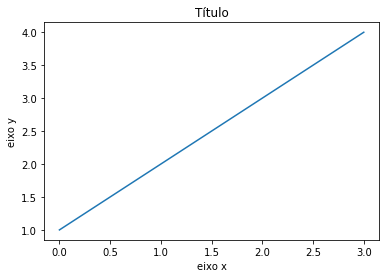

In [111]:
plt.plot([1, 2, 3, 4]) #plt.plot([1, 2, 3, 4],[0, 1, 2, 3])
#plt.plot([1, 2, 3, 4], 'ro')
plt.title('Título')
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.show()

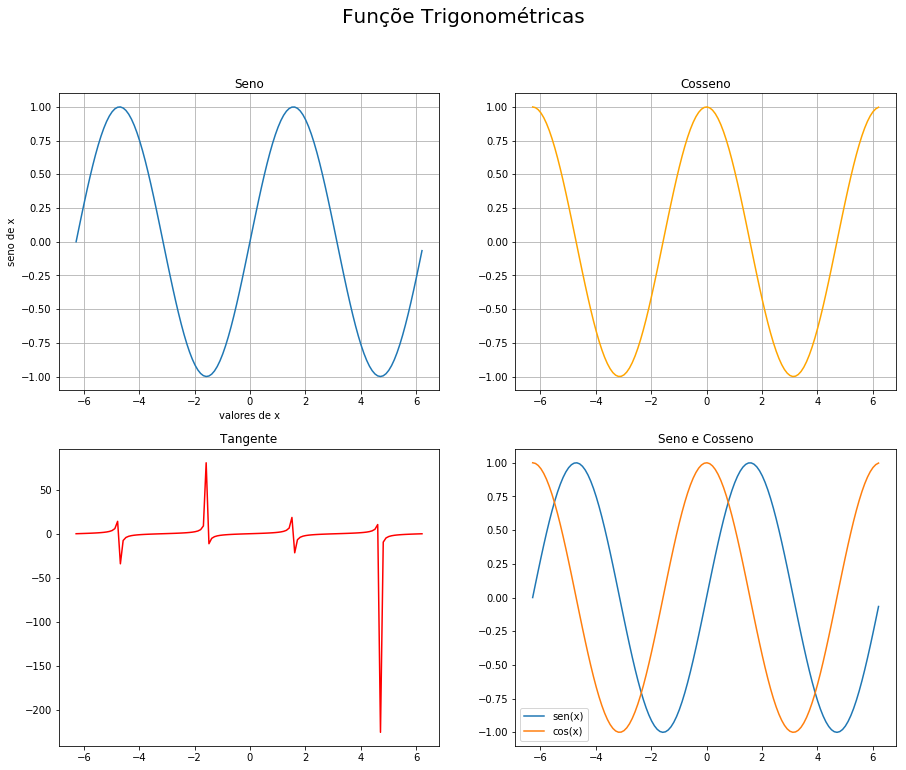

In [112]:
x = np.arange(-2*np.pi,2*np.pi,0.1)
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))
fig1.suptitle('Funçõe Trigonométricas', size=20)

f1_axes[0,0].plot(x, np.sin(x))
f1_axes[0,0].set_title('Seno')
f1_axes[0,0].set_xlabel('valores de x')
f1_axes[0,0].set_ylabel('seno de x')
f1_axes[0,0].grid()

f1_axes[0,1].plot(x, np.cos(x), color='orange')
f1_axes[0,1].set_title('Cosseno')
f1_axes[0,1].grid()

f1_axes[1,0].plot(x, np.tan(x), color='red')
f1_axes[1,0].set_title('Tangente')

f1_axes[1,1].plot(x, np.sin(x), label='sen(x)')
f1_axes[1,1].plot(x, np.cos(x), label='cos(x)')
f1_axes[1,1].set_title('Seno e Cosseno')
f1_axes[1,1].legend()

plt.show()

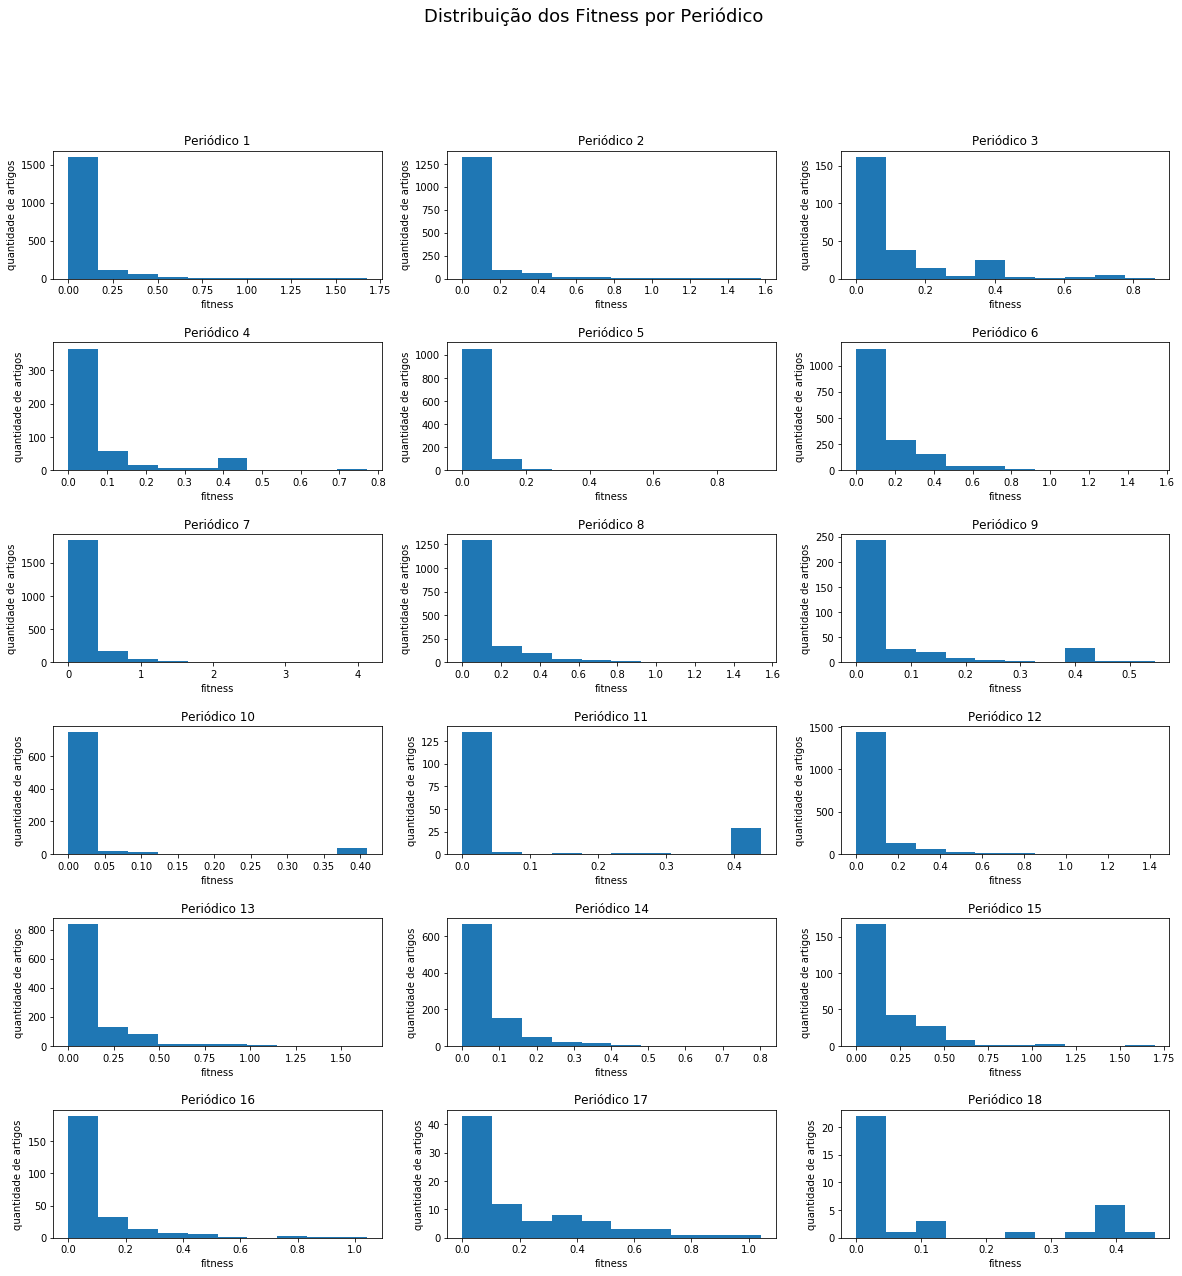

In [113]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=6, figsize=(20, 20))
fig1.suptitle('Distribuição dos Fitness por Periódico', size=18)
fig1.subplots_adjust(hspace=0.5)

k=0
for i in range(6):
    for j in range(3):
        k = k +1
        f1_axes[i,j].hist(df_param2[df_param2['id_j']==k].fitness)
        f1_axes[i,j].set_title('Periódico ' + str(k))
        f1_axes[i,j].set_xlabel('fitness')
        f1_axes[i,j].set_ylabel('quantidade de artigos')

plt.show()